In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot defaults
sns.set()                       # sets default plot style
sns.set_context("paper")        # sets default plot context
plt.rc('figure', figsize=(16,8))# sets default figure size
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc(['xtick', 'ytick'], labelsize=12)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # fontsize of the legend labels

# Read files with training dataset and cancer labels into pandas DataFrames
file = 'cardio_train.csv'
data = pd.read_csv(file, sep=';', header=0, index_col=0)

data.info()

# Convert gender to categorical datatype
data.gender = data.gender.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null category
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smok

In [2]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data['age'] = np.floor(data['age'] / 365)

In [4]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data['height'] = data['height']/100
data['BMI'] = round((data['weight'] / data['height']**2), 1)

In [7]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.9
2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.7
4,47.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.0


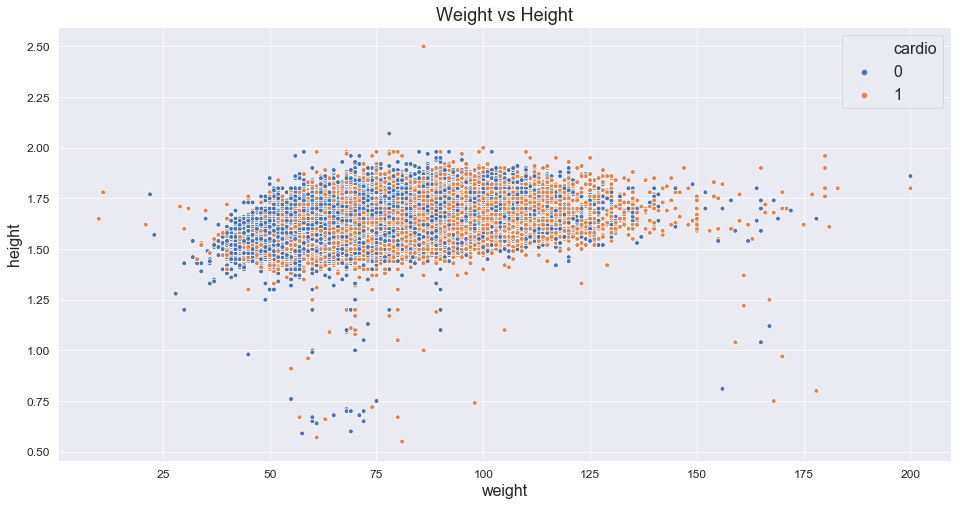

In [8]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.weight, y=data.height, hue=data.cardio, marker='o')
plt.title('Weight vs Height')
plt.show()

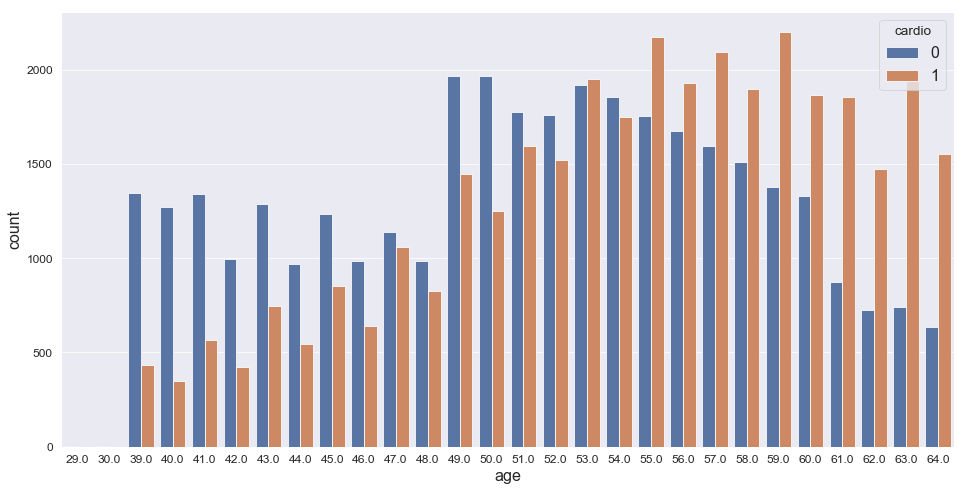

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', hue='cardio', data=data)
plt.show()

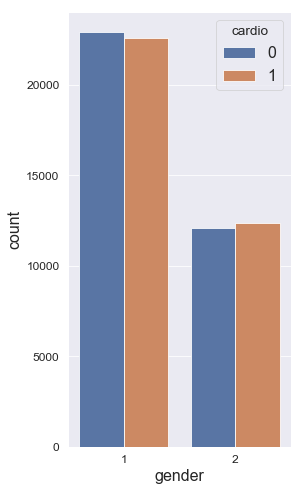

In [14]:
plt.figure(figsize=(4,8))
sns.countplot(x='gender', hue='cardio', data=data)
plt.show()

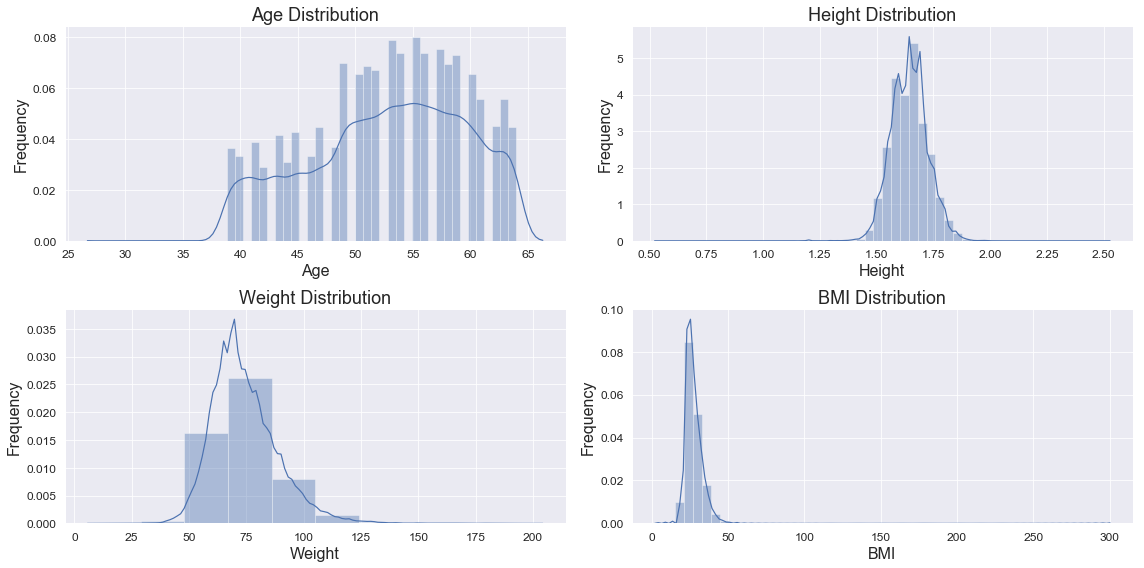

In [15]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(data.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
sns.distplot(data.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
sns.distplot(data.weight, bins=10)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
sns.distplot(data.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

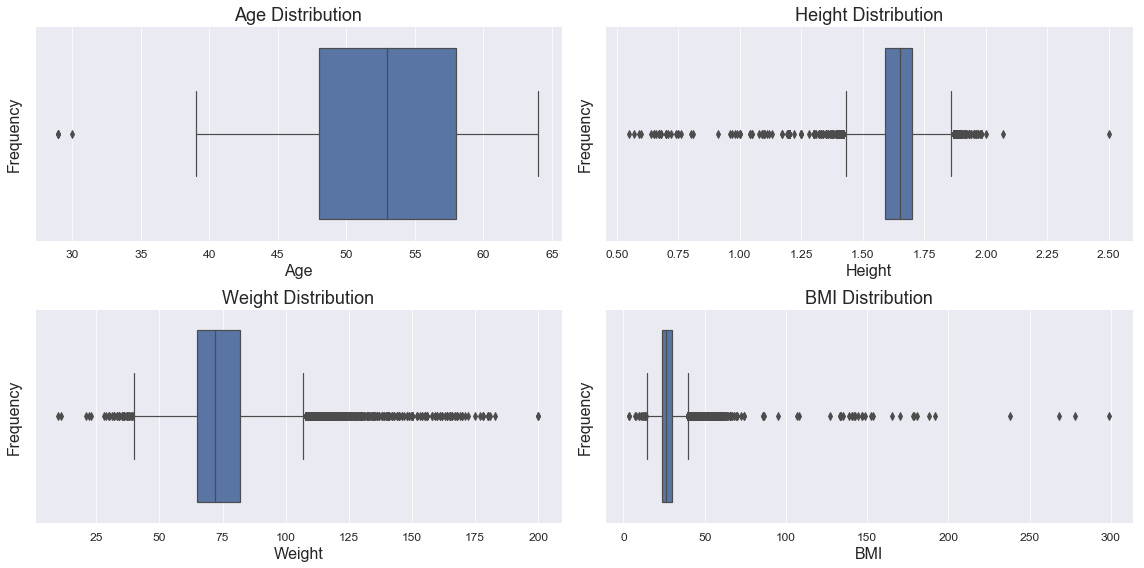

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(data.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
sns.boxplot(data.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
sns.boxplot(data.weight)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
sns.boxplot(data.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()